 ## Анализ и очистка датасета с данными о вакансиях аналитиков

**Описание задачи:**  
Данные, полученные из европейских сайтов для размещения вакансий, необходимо очистить и выбрать только те вакансии, которые подходят для начинающих аналитиков данных в Европе.

**Описание данных:**    
    
job_title - название вакансии  
area - полное название места работы  
city - город места работы  
country - страна места работы  
workplace - тип занятости  
company_name - название компании-работодателя  
ndustry - сфера деятельности компании-работодателя  
company_size - размер компании-работодателя  
job_description - описание вакансии  
posted_date - дата публикации вакансии  
applicants - количество откликов на вакансию

# <a id="title1">План :</a>
### 1. Выгрузка данных, знакомство с данными 
### 2. Проверка на наличие дубликатов, аномалий  
### 3. Обработка пропусков
### 4. Удаление нерелевантных значений (тех, кто не является аналитиками данных)  
### 5. Обработка даты  
### 6. Добавление столбца с основными навыками (выделение нужных навыков)
### 7. Удаление лишних колонок

In [1]:
#Выгружаем необходимые библиотеки.
import pandas as pd
import numpy as np
import datetime

In [2]:
#Применение команды set_option для отображения всех строк и всех столбцов.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
#Подгружаем данные.
data = pd.read_csv('C:\\Users\Tatiana\Desktop\Обучение\Данные\\masterskaya_LinkedIn_2023_05_1.csv')
data.head(10) 

,Unnamed: 0,job_title,area,city,country,workplace,company_name,industry,company_size,job_description,posted_date,applicants
0,0,Data Analyst,"['Basel', 'Basel', 'Switzerland']",Basel,Switzerland,On-site,PharmiWeb.Jobs: Global Life Science Jobs,Staffing & Recruiting,11-50,About the job\n \n\n \n ...,1 week ago,47.0
1,1,Data Analyst - Logistics,"['Coventry', 'England', 'United Kingdom']",Coventry,United Kingdom,On-site,Resolute Recruitment,NaN,NaN,About the job,1 week ago,NaN
2,2,Data Analyst - Logistics,"['Coventry', 'England', 'United Kingdom']",Coventry,United Kingdom,On-site,Resolute Recruitment,NaN,NaN,About the job\n \n\n \nData Analyst - L...,1 week ago,NaN
3,3,Data Analyst (Space & Planning),"['South Molton', 'England', 'United Kingdom']",South Molton,United Kingdom,On-site,Mole Valley Farmers,NaN,NaN,About the job\n \n\n \nSalary: To be di...,1 week ago,NaN
4,4,Data Analyst,"['Lugano', 'Ticino', 'Switzerland']",Lugano,Switzerland,On-site,FORFIRM,NaN,NaN,About the job\n \n\n \nFORFIRM is provi...,2 weeks ago,NaN
5,5,Data Analyst - Logistics,"['Southampton', 'England', 'United Kingdom']",Southampton,United Kingdom,On-site,"Butler, Bridge & May",NaN,NaN,About the job\n \n\n \nLocation: Southa...,6 days ago,NaN
6,6,Data Analyst,"['Leeds', 'England', 'United Kingdom']",Leeds,United Kingdom,On-site,Maria Mallaband Care Group Ltd,NaN,NaN,About the job\n \n\n \nWe’re Maria Mall...,3 weeks ago,NaN
7,7,Data Analyst,"['Nuneaton', 'England', 'United Kingdom']",Nuneaton,United Kingdom,Hybrid,Kelly Group,NaN,NaN,About the job\n \n\n \nKelly Group are ...,2 days ago,NaN
8,8,Data Analyst,"['Paris', 'Île-de-France', 'France']",Paris,France,On-site,eXalt,NaN,NaN,About the job\n \n\n \nQui sont-ils ?\n...,2 weeks ago,140.0
9,9,Data Analyst - Hybrid Working,"['Cambridge', 'England', 'United Kingdom']",Cambridge,United Kingdom,On-site,Blue Arrow,NaN,NaN,About the job\n \n\n \nData AnalystHybr...,2 weeks ago,NaN


In [4]:
#Вывод информации о данных на экран
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       998 non-null    int64  
 1   job_title        998 non-null    object 
 2   area             998 non-null    object 
 3   city             998 non-null    object 
 4   country          998 non-null    object 
 5   workplace        930 non-null    object 
 6   company_name     996 non-null    object 
 7   industry         964 non-null    object 
 8   company_size     963 non-null    object 
 9   job_description  998 non-null    object 
 10  posted_date      998 non-null    object 
 11  applicants       838 non-null    float64
dtypes: float64(1), int64(1), object(10)
memory usage: 93.7+ KB


Общая информация говорит, что массив влючает 998 строк.  
Данные представлены 3-мя типами: дробные числа, целые числа и строки.  
Пропусков немного, но они есть в столбцах: `workplace`, `company_name`, `industry`, `company_size`, `applicants`.

[Перейти к **Плану**](#title1)

**2. Проверка на наличие дубликатов, аномалий.**

Проверим массив на наличие явных дубликатов, а затем колонки `country`,	`workplace`, `industry`, `company_size` на наличие неявных дубликатов.  
Выбор остановился на этих колонках, т.к. их данных будет использованы в дальнешем анализе и возможно пригодятся для сортировки или группировки значений. 
С колонками `job_title` и `job_description`, в которых много мусора, будет проведена отдельная работа.

In [5]:
#Проверка данных на наличие явных дубликатов, исключив 0-ую колонку, в которой все значения уникальны.
data[1:11].duplicated().sum()

0

Явные дубликаты отсутствуют.

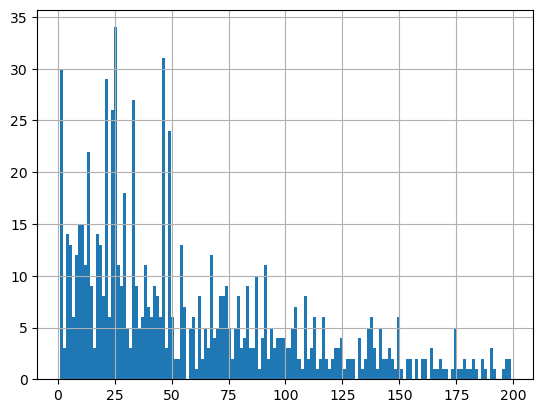

In [6]:
#Проверим колонку `applicants` на наличие аномалий (выбросов)
data['applicants'].hist(bins=150);

Есть вакансии, количество откликов на которые, аномально высоко. Будем иметь это в виду.

In [7]:
#Выводим название колонок для проверки коррктности их написания
[column for column in data]

['Unnamed: 0',
 'job_title',
 'area',
 'city',
 'country',
 'workplace',
 'company_name',
 'industry',
 'company_size',
 'job_description',
 'posted_date',
 'applicants']

Название колонок написаны корретно: пробелы и лишние символы отсутствуют, использован змеиный регистр.

In [8]:
#Проверим колонку 'workplace' на наличие дубликатов.
data['workplace'].unique()

array(['On-site', 'Hybrid', nan, 'Remote'], dtype=object)

In [9]:
#Проверим колонку 'company_size' на наличие дубликатов.
data['company_size'].unique()

array(['11-50', nan, '10,001+', '51-200', '1,001-5,000', '501-1,000',
       '0-1', '201-500', '5,001-10,000', '2-10'], dtype=object)

In [10]:
#Напишем функицю чтобы разбить компании на более крупные сегменты
def categorize_company(size):
    try:
        if '0-1' in size or '2-10'in size or '11-50' in size:
            return 'small'
        elif '51-200'in size or '201-500' in size:
            return 'average'
        elif '501-1,000' in size or '1,001-5,000' in size:
            return 'big'
        elif '5,001-10,000' in size or '10,001+' in size:
            return 'huge'
    except:
        pass

In [11]:
#Применим функицю 
data['company_category'] = data['company_size'].apply(categorize_company)
data.head(10)

,Unnamed: 0,job_title,area,city,country,workplace,company_name,industry,company_size,job_description,posted_date,applicants,company_category
0,0,Data Analyst,"['Basel', 'Basel', 'Switzerland']",Basel,Switzerland,On-site,PharmiWeb.Jobs: Global Life Science Jobs,Staffing & Recruiting,11-50,About the job\n \n\n \n ...,1 week ago,47.0,small
1,1,Data Analyst - Logistics,"['Coventry', 'England', 'United Kingdom']",Coventry,United Kingdom,On-site,Resolute Recruitment,NaN,NaN,About the job,1 week ago,NaN,None
2,2,Data Analyst - Logistics,"['Coventry', 'England', 'United Kingdom']",Coventry,United Kingdom,On-site,Resolute Recruitment,NaN,NaN,About the job\n \n\n \nData Analyst - L...,1 week ago,NaN,None
3,3,Data Analyst (Space & Planning),"['South Molton', 'England', 'United Kingdom']",South Molton,United Kingdom,On-site,Mole Valley Farmers,NaN,NaN,About the job\n \n\n \nSalary: To be di...,1 week ago,NaN,None
4,4,Data Analyst,"['Lugano', 'Ticino', 'Switzerland']",Lugano,Switzerland,On-site,FORFIRM,NaN,NaN,About the job\n \n\n \nFORFIRM is provi...,2 weeks ago,NaN,None
5,5,Data Analyst - Logistics,"['Southampton', 'England', 'United Kingdom']",Southampton,United Kingdom,On-site,"Butler, Bridge & May",NaN,NaN,About the job\n \n\n \nLocation: Southa...,6 days ago,NaN,None
6,6,Data Analyst,"['Leeds', 'England', 'United Kingdom']",Leeds,United Kingdom,On-site,Maria Mallaband Care Group Ltd,NaN,NaN,About the job\n \n\n \nWe’re Maria Mall...,3 weeks ago,NaN,None
7,7,Data Analyst,"['Nuneaton', 'England', 'United Kingdom']",Nuneaton,United Kingdom,Hybrid,Kelly Group,NaN,NaN,About the job\n \n\n \nKelly Group are ...,2 days ago,NaN,None
8,8,Data Analyst,"['Paris', 'Île-de-France', 'France']",Paris,France,On-site,eXalt,NaN,NaN,About the job\n \n\n \nQui sont-ils ?\n...,2 weeks ago,140.0,None
9,9,Data Analyst - Hybrid Working,"['Cambridge', 'England', 'United Kingdom']",Cambridge,United Kingdom,On-site,Blue Arrow,NaN,NaN,About the job\n \n\n \nData AnalystHybr...,2 weeks ago,NaN,None


In [12]:
#Проверим колонку 'industry' на наличие дубликатов.
data['industry'].unique()

array(['Staffing & Recruiting', nan, 'Medical Device',
       'Information Technology & Services',
       'Transportation/Trucking/Railroad', 'Airlines/Aviation',
       'Real Estate', 'Financial Services', 'Entertainment',
       'Computer Software', 'Marketing & Advertising', 'Internet',
       'Consumer Goods', 'Human Resources', 'Banking',
       'Public Relations & Communications', 'Packaging & Containers',
       'Management Consulting', 'Telecommunications', 'Newspapers',
       'Higher Education', 'Retail', 'Insurance',
       'Leisure, Travel & Tourism', 'Automotive', 'Cosmetics',
       'Utilities', 'International Trade & Development',
       'Information Services', 'Computer Games', 'Pharmaceuticals',
       'Military', 'Farming', 'Aviation & Aerospace', 'Apparel & Fashion',
       'Electrical & Electronic Manufacturing', 'Wholesale', 'Publishing',
       'Food Production', 'Outsourcing/Offshoring', 'Performing Arts',
       'Translation & Localization', 'Gambling & Casinos'

Уникальных значений много, поэтому при помощи excel выяснили, что неявные дубликаты отсутствуют. Сферы деятельности указаны корректно.

In [13]:
#Проверим колонку 'country' на наличие неявных дубликатов.
data['country'].unique()

array(['Switzerland', 'United Kingdom', 'France', 'Netherlands',
       'Ireland', 'Poland', 'Hungary', 'Greece', 'Italy', 'Sweden',
       'Lithuania', 'Belgium', 'Luxembourg', 'Germany',
       'Brussels Metropolitan Area', 'Portugal',
       'Greater Paris Metropolitan Region', 'Bulgaria', 'Spain',
       'Greater Palma de Mallorca Metropolitan Area', 'Czechia',
       'Warsaw Metropolitan Area', 'Wroclaw Metropolitan Area', 'Latvia',
       'Estonia', 'Greater Barcelona Metropolitan Area', 'Malta',
       'Austria', 'Iasi Metropolitan Area', 'Cologne Bonn Region',
       'Greater Munster Area', 'Greater Banska Bystrica Area',
       'Greater Nuremberg Metropolitan Area', 'Norway',
       'Berlin Metropolitan Area', 'Denmark', 'Finland', 'Romania',
       'Rotterdam and The Hague', 'Prague Metropolitan Area',
       'Greater Pau Area', 'Monaco', 'Lisbon Metropolitan Area',
       'Athens Metropolitan Area', 'Greater Lyon Area',
       'Greater Milan Metropolitan Area', 'Croatia', 'S

In [14]:
#Используем функцию чтобы переименовать некорректно отраженные страны 
def replace_wrong_country(wrong_country, correct_country): 
    for wrong_country in wrong_country: 
        data['country'] = data['country'].replace(wrong_country, correct_country) 
        
wrong_1 = ['Greater Barcelona Metropolitan Area','Greater Palma de Mallorca Metropolitan Area','Greater Madrid Metropolitan Area']
correct_name_1 = 'Spain'
replace_wrong_country(wrong_1, correct_name_1) 

wrong_2 = ['Greater Banska Bystrica Area']
correct_name_2 = 'Slovakia'
replace_wrong_country(wrong_2, correct_name_2)

wrong_3 = ['Iasi Metropolitan Area']
correct_name_3 = 'Romania'
replace_wrong_country(wrong_3, correct_name_3)

wrong_4 = ['Lisbon Metropolitan Area']
correct_name_4 = 'Portugal'
replace_wrong_country(wrong_4, correct_name_4)

wrong_5 = ['Warsaw Metropolitan Area']
correct_name_5 = 'Poland'
replace_wrong_country(wrong_5, correct_name_5)

wrong_6 = ['Greater Oslo Region']
correct_name_6 = 'Norway'
replace_wrong_country(wrong_6, correct_name_6)

wrong_7 = ['Eindhoven Area', 'Amsterdam Area', 'Rotterdam and The Hague']
correct_name_7 = 'Netherlands'
replace_wrong_country(wrong_7, correct_name_7)

wrong_8 = ['Greater Milan Metropolitan Area', 'Greater Verona Metropolitan Area']
correct_name_8 = 'Italy'
replace_wrong_country(wrong_8, correct_name_8)

wrong_9 = ['Greater Munster Area']
correct_name_9 = 'Ireland'
replace_wrong_country(wrong_9, correct_name_9)

wrong_10 = ['Athens Metropolitan Area']
correct_name_10 = 'Greece'
replace_wrong_country(wrong_10, correct_name_10)

wrong_11 = ['Stuttgart Region','Cologne Bonn Region', 'Greater Nuremberg Metropolitan Area', 'Greater Munich Metropolitan Area', 'Berlin Metropolitan Area']
correct_name_11 = 'Germany'
replace_wrong_country(wrong_11, correct_name_11)

wrong_12 = ['Greater Lyon Area', 'Greater Dijon Area', 'Greater Pau Area', 'Greater Paris Metropolitan Region']
correct_name_12 = 'France'
replace_wrong_country(wrong_12, correct_name_12)

wrong_13 = ['Prague Metropolitan Area', 'Czechia']
correct_name_13 = 'Czech'
replace_wrong_country(wrong_13, correct_name_13)

wrong_14 = ['Brussels Metropolitan Area']
correct_name_14 = 'Belgium'
replace_wrong_country(wrong_14, correct_name_14)

wrong_15 = ['Wroclaw Metropolitan Area','Krakow Metropolitan Area']
correct_name_15 = 'Poland'
replace_wrong_country(wrong_15, correct_name_15)

wrong_16= ['Copenhagen Metropolitan Area']
correct_name_16 = 'Denmark'
replace_wrong_country(wrong_16, correct_name_16)

In [15]:
#Проверим результат работы функции.
data['country'].unique()

array(['Switzerland', 'United Kingdom', 'France', 'Netherlands',
       'Ireland', 'Poland', 'Hungary', 'Greece', 'Italy', 'Sweden',
       'Lithuania', 'Belgium', 'Luxembourg', 'Germany', 'Portugal',
       'Bulgaria', 'Spain', 'Czech', 'Latvia', 'Estonia', 'Malta',
       'Austria', 'Romania', 'Slovakia', 'Norway', 'Denmark', 'Finland',
       'Monaco', 'Croatia'], dtype=object)

In [16]:
#Посчитаем количесиво вакансий в каждой стране
data['country'].value_counts()

Germany           162
Italy             159
France            122
Netherlands        90
United Kingdom     89
Spain              63
Poland             60
Belgium            44
Portugal           26
Czech              26
Sweden             22
Ireland            17
Greece             16
Bulgaria           14
Luxembourg         14
Hungary            12
Austria             9
Romania             9
Denmark             6
Lithuania           5
Latvia              5
Malta               5
Slovakia            5
Finland             4
Switzerland         4
Norway              4
Croatia             3
Estonia             2
Monaco              1
Name: country, dtype: int64

Лидеры по числу вакансий Germany, Italy, France. 

[Перейти к **Плану**](#title1)

**3. Обработка пропусков**

In [17]:
#Выведем процент пропусков в колонках
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100,2)))

Unnamed: 0 - 0.0%
job_title - 0.0%
area - 0.0%
city - 0.0%
country - 0.0%
workplace - 6.81%
company_name - 0.2%
industry - 3.41%
company_size - 3.51%
job_description - 0.0%
posted_date - 0.0%
applicants - 16.03%
company_category - 3.51%


In [18]:
#Выведем количество строк. Пригодится для самопроверки в дальнейшем.
data.shape[0] 

998

In [19]:
#Удалим те строки, где есть пропуски в 2-х и больше колонках, т.е. есть значительная потеря данных
data = data.dropna(thresh= 10)

In [20]:
#Выведем количество оставшихся строк.
data.shape[0]

976

In [21]:
#Проверим, как изменился процент пропусков в колонках
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100,2)))

Unnamed: 0 - 0.0%
job_title - 0.0%
area - 0.0%
city - 0.0%
country - 0.0%
workplace - 6.66%
company_name - 0.0%
industry - 1.23%
company_size - 1.33%
job_description - 0.0%
posted_date - 0.0%
applicants - 14.55%
company_category - 1.33%


Пропусков стало заметно меньше, но ушли не все. 

In [22]:
#Заполним заглушкой пропущенные значения в колонке applicants, где наибольшее количество пропусков.
data['applicants'] = data['applicants'].fillna(-1)

[Перейти к **Плану**](#title1)

**4. Удаление нерелевантных значений (тех, кто не является аналитиками данных)**

In [23]:
#Выведем уникальные значения, чтобы понять какие ваканссии есть в колонке
data['job_title'].unique()

array(['Data Analyst', 'Commercial Data Analyst', 'Data Analyst (FT)',
       'Data Analyst (Space & Planning)', 'Data Analyst II',
       'Business Intelligence Analyst', 'Data Analyst (F/H)',
       'BI Analyst', 'Data Analyst Associate', 'Product Data Analyst',
       'Graduate Data Analyst', 'Digital Data Analyst',
       'Business Intelligence Analyst Junior', 'Data analyst H/F',
       'Data Analyst (m/f/d)', 'Analytics Consultant', 'Data Analyst F/H',
       'Consultor BI', 'Data Analyst H/F', 'Statistical Data Analyst',
       'Digital Data Analyst (H/F)',
       'Data Analyst - €60,- per hour - Amsterdam based',
       'Data & Analytics Senior Analyst',
       'JUNIOR DATA ANALYST – Aerospace', 'Data Analyst - Operations',
       'Data Analyst (H/F)', 'BUSINESS INTELLIGENCE ANALYST',
       'Business Intelligence Analyst (m/w/d)',
       'Analista superior de datos', 'Junior Data Analyst',
       'Web Data Analyst F/H', 'BUSINESS ANALYST_Power BI',
       'Junior Data Analyst 

Уникальных значений много, поэтому при помощи excel отфильтруем нужные данные. 

In [24]:
#Удалим лишние символы и приведем к нижнему регистру
data['job_title'] = data['job_title'].replace(r'[-\^\:\📢\&\#\/\*]',' ',regex=True).replace(r'\s+',' ',regex=True).str.lower()

In [25]:
#Выдерем только те строки, в наименовании вакансий которых есть слово аналитик
relevant_title = ["analyst", "analista","analityk","analytics", "analist", "analytik","dataanalytiker", "analytiker","analysis","analytique","analityk"]
new_job = list(set(data['job_title'][data['job_title'].str.contains('|'.join(relevant_title))]))

In [26]:
#Из полученного массива удерем все вакансии, которые не связаны с анализом данных
x = ['senior', 'mid',\
'medior','middle','mid','master','logistics', 'consultant','statistical','chemical','sap', 'inventory', 'head',\
'policy','research','information', 'business','sourcing planning', 'finance analyst', 'strategy', ' insights']

filtered_data = [item for item in new_job if not any (word in item.lower() for word in x)]
filtered_data

['data analyst transportation',
 'process analyst',
 'analyste de données pièces de rechange automobile',
 'b2b analyst, bulgaria',
 'data analyst pilotage operationnel h f',
 'functional analyst',
 'data analyst poland',
 'data analyst €60, per hour amsterdam based',
 'data analyst bseu raw materials planning',
 'bi analyst, power bi champion, cee based in warsaw',
 'marketing analyst (data analytics and bi)',
 'online data analyst (m,f,d)',
 'data analyst en alternance (94) dcf ab f h',
 'ingeniero a analista de datos big data',
 'data analyst flanders digital',
 'data technology analyst',
 'salesforce data analyst (f m d)',
 'junior innovation analyst',
 'digital data analist (32 38 uur)',
 'danish language data analyst barcelona',
 'data analyst data scientist (m f d)',
 'analyst',
 'marketing analyst',
 'commercial analyst',
 'analista de proyecto digitalización',
 'it solution analyst (m f n)',
 'data analyst | deals (m a) | cdi | h f',
 'data analyst alternance boursorama (h f)'

In [27]:
#Отфильтрованные данные подгрузим в основной датасет.
data = data.query('job_title == @filtered_data')

In [28]:
#Проверим столько в итоге осталось строк
data.shape[0]

598

[Перейти к **Плану**](#title1)

**5. Обработка даты**

In [29]:
#Напишем функцию, которая переведет недели,часы, минуты в дни
days_conversion = {
    "hour": 1,
    "hours": 1,
    "minute": 1,
    "minutes": 1,
    "day": 1,
    "days": 1,
    "week": 7,
    "weeks": 7}
def convert_to_days(time):
    value, unit, other = time.split(" ")
    return int(value) * days_conversion[unit]

In [30]:
#Применим и проверим функцию
data['posted_days_ago'] = data['posted_date'].apply(convert_to_days)
data.reset_index(inplace= True)
data.head()

,index,Unnamed: 0,job_title,area,city,country,workplace,company_name,industry,company_size,job_description,posted_date,applicants,company_category,posted_days_ago
0,0,0,data analyst,"['Basel', 'Basel', 'Switzerland']",Basel,Switzerland,On-site,PharmiWeb.Jobs: Global Life Science Jobs,Staffing & Recruiting,11-50,About the job\n \n\n \n ...,1 week ago,47.0,small,7
1,8,8,data analyst,"['Paris', 'Île-de-France', 'France']",Paris,France,On-site,eXalt,NaN,NaN,About the job\n \n\n \nQui sont-ils ?\n...,2 weeks ago,140.0,None,14
2,11,11,commercial data analyst,"['Schiphol', 'North Holland', 'Netherlands']",Schiphol,Netherlands,On-site,Royal Schiphol Group,NaN,NaN,About the job\n \n\n \n ...,1 week ago,13.0,None,7
3,16,16,data analyst (ft),"['Belfast', 'Northern Ireland', 'United Kingdom']",Belfast,United Kingdom,On-site,Black Fox Solutions,NaN,NaN,About the job\n \n\n \nData Analyst - G...,2 weeks ago,7.0,None,14
4,19,19,data analyst,"['Bristol', 'England', 'United Kingdom']",Bristol,United Kingdom,On-site,Babcock,NaN,NaN,About the job\n \n \n\n\n\n This j...,2 weeks ago,53.0,None,14


**6. Добавление столбца с основными навыками (выделение нужных навыков)**

In [31]:
#Удалим лишние символы и приведем книжнему регистру
data['job_description'] = data['job_description'].replace(r'[-\^\?\&\#\*]',' ',regex=True).replace(r'\s+',' ',regex=True).str.lower()

In [32]:
#Добавим столбцы с наличием(отсутствием) навыков
skills=  ['python', 'databases' 'sql', 'analysis', 'analyze',' r ' 'business intelligence',' bi ','tableau',\
               'statistical', 'dashboard', 'statistic', 'visualization','pyhton']
for i in skills:
    data[i] = data['job_description'].str.contains(i).astype('int')

In [33]:
#Проверим результат
data.head()

,index,Unnamed: 0,job_title,area,city,country,workplace,company_name,industry,company_size,job_description,posted_date,applicants,company_category,posted_days_ago,python,databasessql,analysis,analyze,r business intelligence,bi,tableau,statistical,dashboard,statistic,visualization,pyhton
0,0,0,data analyst,"['Basel', 'Basel', 'Switzerland']",Basel,Switzerland,On-site,PharmiWeb.Jobs: Global Life Science Jobs,Staffing & Recruiting,11-50,about the job what you will achieve this posit...,1 week ago,47.0,small,7,0,0,0,1,0,0,0,1,0,1,0,0
1,8,8,data analyst,"['Paris', 'Île-de-France', 'France']",Paris,France,On-site,eXalt,NaN,NaN,about the job qui sont ils cabinet de conseil ...,2 weeks ago,140.0,None,14,0,0,0,0,0,0,1,0,1,0,0,0
2,11,11,commercial data analyst,"['Schiphol', 'North Holland', 'Netherlands']",Schiphol,Netherlands,On-site,Royal Schiphol Group,NaN,NaN,about the job de functie welkom bij royal schi...,1 week ago,13.0,None,7,0,0,0,0,0,1,0,0,1,0,0,0
3,16,16,data analyst (ft),"['Belfast', 'Northern Ireland', 'United Kingdom']",Belfast,United Kingdom,On-site,Black Fox Solutions,NaN,NaN,about the job data analyst greater belfast are...,2 weeks ago,7.0,None,14,0,0,0,0,0,0,0,0,0,0,0,0
4,19,19,data analyst,"['Bristol', 'England', 'United Kingdom']",Bristol,United Kingdom,On-site,Babcock,NaN,NaN,about the job this job is sourced from a job b...,2 weeks ago,53.0,None,14,1,0,1,0,0,1,0,0,0,0,0,0


**7.Удаление лишних колонок**

In [34]:
data.drop(columns = ['index', 'Unnamed: 0', 'area', 'city', 'company_size', 'posted_date'], axis = 1) 

,job_title,country,workplace,company_name,industry,job_description,applicants,company_category,posted_days_ago,python,databasessql,analysis,analyze,r business intelligence,bi,tableau,statistical,dashboard,statistic,visualization,pyhton
0,data analyst,Switzerland,On-site,PharmiWeb.Jobs: Global Life Science Jobs,Staffing & Recruiting,about the job what you will achieve this posit...,47.0,small,7,0,0,0,1,0,0,0,1,0,1,0,0
1,data analyst,France,On-site,eXalt,NaN,about the job qui sont ils cabinet de conseil ...,140.0,None,14,0,0,0,0,0,0,1,0,1,0,0,0
2,commercial data analyst,Netherlands,On-site,Royal Schiphol Group,NaN,about the job de functie welkom bij royal schi...,13.0,None,7,0,0,0,0,0,1,0,0,1,0,0,0
3,data analyst (ft),United Kingdom,On-site,Black Fox Solutions,NaN,about the job data analyst greater belfast are...,7.0,None,14,0,0,0,0,0,0,0,0,0,0,0,0
4,data analyst,United Kingdom,On-site,Babcock,NaN,about the job this job is sourced from a job b...,53.0,None,14,1,0,1,0,0,1,0,0,0,0,0,0
5,data analyst (space planning),United Kingdom,On-site,networx | Recruitment Software & Services by IRIS,NaN,about the job salary: to be discussed on appli...,13.0,None,6,0,0,1,0,0,0,0,0,0,0,0,0
6,data analyst ii,Ireland,On-site,PharmiWeb.Jobs: Global Life Science Jobs,Staffing & Recruiting,about the job title: senior qa associate contr...,30.0,small,7,1,0,1,0,0,0,0,1,1,1,0,0
7,data analyst (f h),France,Hybrid,Neos-SDI,Information Technology & Services,about the job l’équipe data de dijon s’agrandi...,141.0,average,7,0,0,0,0,0,1,1,0,0,0,0,0
8,bi analyst,Hungary,Hybrid,GLS,Transportation/Trucking/Railroad,about the job a gls dinamikusan növekedő üzlet...,36.0,huge,7,0,0,0,0,0,1,1,0,0,0,0,0
9,data analyst,United Kingdom,On-site,Axon Moore,Staffing & Recruiting,about the job this job is sourced from a job b...,81.0,average,21,1,0,1,0,0,1,0,0,0,0,0,0


В результате, в датасете остались только те вакансии, которые связаны с анализом данных и их критерии подходят для уровня джунов и мидлов.

[Перейти к Заголовку](#title1)